In [6]:
# Import packages

import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [7]:
# Connect to sql server database DB Browser

connexion = sqlite3.connect('daily_activity_dataframe.db')

In [8]:
# Import dataset

daily_activity_dataframe = pd.read_csv("dailyActivity_merged.csv")

In [9]:
# Have a view of the dataset

daily_activity_dataframe.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [10]:
# Show information about dataset

daily_activity_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [11]:
# Convert Dtype of ActivityDate to datetime and YYYY-MM-DD format

daily_activity_dataframe["ActivityDate"] = pd.to_datetime(daily_activity_dataframe["ActivityDate"], format="%m/%d/%Y")

# check the convert has been done

daily_activity_dataframe.info()

# check for the right format

daily_activity_dataframe["ActivityDate"].head(10)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
5   2016-04-17
6   2016-04-18
7   2016-04-19
8   2016-04-20
9   2016-04-21
Name: ActivityDate, dtype: datetime64[ns]

In [12]:
#check for missing or null values

pd.read_sql('PRAGMA table_info(dailyActivity_merged)', connexion)

,cid,name,type,notnull,dflt_value,pk
0,0,Id,INTEGER,0,None,0
1,1,ActivityDate,TEXT,0,None,0
2,2,TotalSteps,INTEGER,0,None,0
3,3,TotalDistance,REAL,0,None,0
4,4,TrackerDistance,REAL,0,None,0
5,5,LoggedActivitiesDistance,INTEGER,0,None,0
6,6,VeryActiveDistance,REAL,0,None,0
7,7,ModeratelyActiveDistance,REAL,0,None,0
8,8,LightActiveDistance,REAL,0,None,0
9,9,SedentaryActiveDistance,INTEGER,0,None,0


In [13]:
#Count the "Id" distinct values to know the exact number of IDs from the dataset

pd.read_sql("SELECT count(DISTINCT Id) FROM dailyActivity_merged", connexion)

,count(DISTINCT Id)
0,33


In [14]:
# create a new column to get some insights about activity in function of days of the week

daily_activity_dataframe['DayOfTheWeek'] = daily_activity_dataframe['ActivityDate'].dt.day_name()

# create news columns to sum the minutes recorded by the app

daily_activity_dataframe['TotalMinutes'] = daily_activity_dataframe['VeryActiveMinutes'] + daily_activity_dataframe['FairlyActiveMinutes'] + daily_activity_dataframe['LightlyActiveMinutes'] + daily_activity_dataframe['SedentaryMinutes']
daily_activity_dataframe['TotalHours'] = round(daily_activity_dataframe['TotalMinutes']/60)

daily_activity_dataframe['DayOfTheWeek'].head(10)



0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
5       Sunday
6       Monday
7      Tuesday
8    Wednesday
9     Thursday
Name: DayOfTheWeek, dtype: object

In [15]:
daily_activity_dataframe['TotalHours'].head(10)

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
5    13.0
6    24.0
7    19.0
8    18.0
9    18.0
Name: TotalHours, dtype: float64

In [16]:
# Descriptive statistics for analyze

daily_activity_dataframe.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalHours
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,20.313830
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,4.437283
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,16.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,24.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,24.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,24.000000


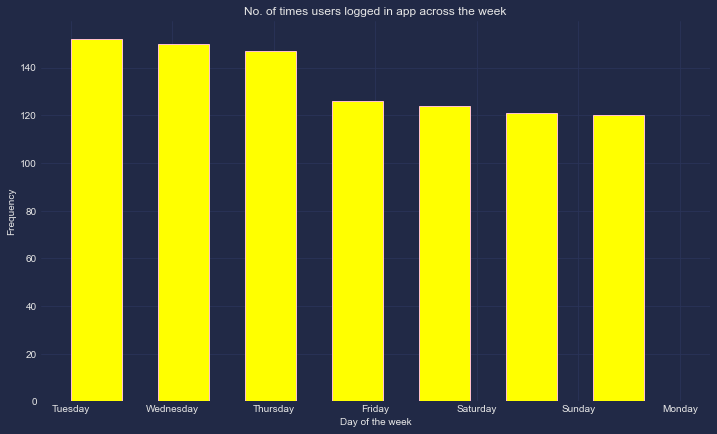

In [36]:
# Visualisation with Histogram

import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import mplcyberpunk

plt.style.use('cyberpunk')
plt.figure(figsize=(12,7))
plt.hist(daily_activity_dataframe.DayOfTheWeek, bins=7, density=False, width=0.5, histtype='bar',align='mid',orientation='vertical',color='yellow',edgecolor='pink')


plt.xlabel("Day of the week")
plt.ylabel("Frequency")
plt.title("No. of times users logged in app across the week")
plt.grid(True)
plt.show()




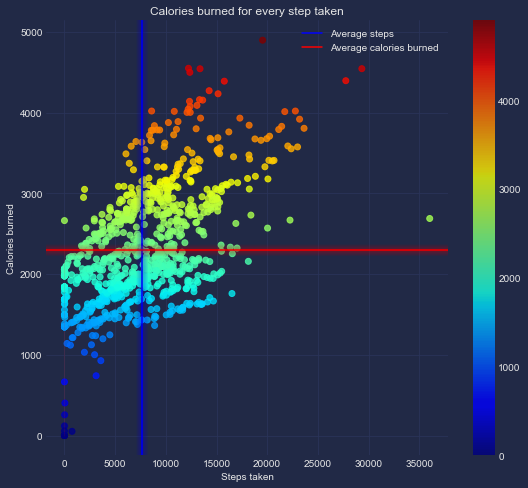

In [30]:
# Visualisation with scatter plot

plt.style.use('cyberpunk')
plt.figure(figsize=(9,8))
plt.scatter(daily_activity_dataframe.TotalSteps, daily_activity_dataframe.Calories, c=daily_activity_dataframe.Calories, alpha=0.8, cmap="jet")

mean_calories = round(daily_activity_dataframe.Calories.mean())
mean_steps = round(daily_activity_dataframe.TotalSteps.mean())

plt.colorbar(orientation = "vertical")
plt.axvline(mean_steps, color = "Blue", label = "Average steps")
plt.axhline(mean_calories, color = "Red", label = "Average calories burned")
plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories burned for every step taken")
plt.grid(True)
plt.legend()
mplcyberpunk.add_glow_effects()
plt.show()

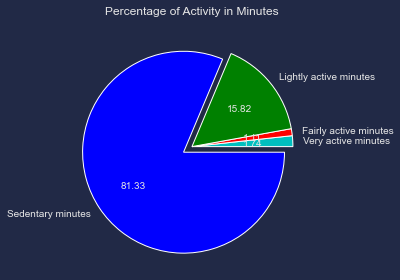

In [37]:
# Visualisation with Pie Chart

VeryActiveMinutes = daily_activity_dataframe["VeryActiveMinutes"].sum()
FairlyActiveMinutes = daily_activity_dataframe["FairlyActiveMinutes"].sum()
LightlyActiveMinutes = daily_activity_dataframe["LightlyActiveMinutes"].sum()
SedentaryMinutes = daily_activity_dataframe["SedentaryMinutes"].sum()

slices = [VeryActiveMinutes,FairlyActiveMinutes ,LightlyActiveMinutes ,SedentaryMinutes ]
labels = ["Very active minutes", "Fairly active minutes", "Lightly active minutes", "Sedentary minutes"]
colours = ["c", "r", "g", "b"]
explode = [0, 0, 0, 0.1]
plt.style.use("cyberpunk")
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "w"}, 
        explode = explode, autopct = "%.2f")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()